# K-Means Clustering für Diamanten

K-Means ist ein iterativer Clustering-Algorithmus, der Daten in eine vordefinierte Anzahl von **k** Clustern unterteilt, indem er die Punkte basierend auf der Nähe zu den Clusterzentroiden gruppiert. Ziel ist es, die Summe der quadratischen Abstände zwischen den Punkten und ihren Zentroiden zu minimieren.


In [6]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.manifold import TSNE



In [7]:
# Daten laden und vorbereiten
# Daten laden
silent = True
%run ../dataLoadAndPrepare.ipynb

print("Features vor dem One-Hot-Encoding:")
display(df.head())  

features = ['carat', 'price', 'depth', 'table' , 'x', 'y', 'z']  
df_cluster = df[features]

print("Für das Clustering werden alle numerischen Features verwendet")

# Features für das Clustering
display(df_cluster.head())


Features vor dem One-Hot-Encoding:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Für das Clustering werden alle numerischen Features verwendet


,carat,price,depth,table,x,y,z
0,0.23,326,61.5,55.0,3.95,3.98,2.43
1,0.21,326,59.8,61.0,3.89,3.84,2.31
2,0.23,327,56.9,65.0,4.05,4.07,2.31
3,0.29,334,62.4,58.0,4.20,4.23,2.63
4,0.31,335,63.3,58.0,4.34,4.35,2.75


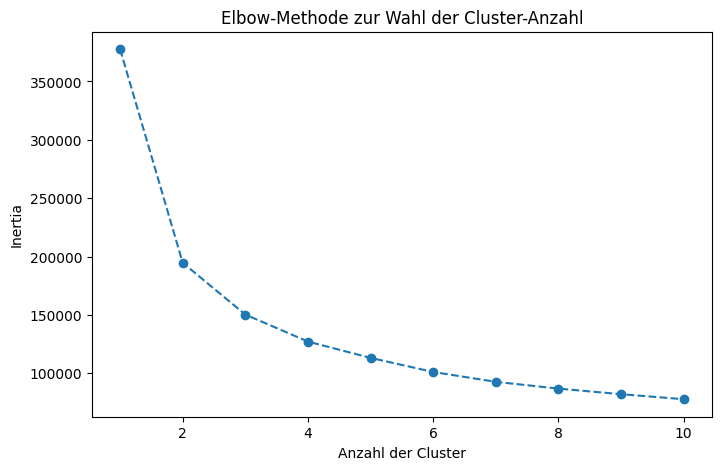

In [8]:
#Bestimmung der Anzahl der Cluster
# Elbow-Methode

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

inertia = []
cluster_range = range(1, 11)  # Testen von 1 bis 10 Clustern

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
# Plot der Inertia-Werte
plt.figure(figsize=(8,5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.title('Elbow-Methode zur Wahl der Cluster-Anzahl')
plt.show()

# Vor k = 2 nimmt die Inertia sehr stark ab.
# Nach k = 3 wird die Reduktion kleiner, d. h., zusätzliche Cluster verbessern die Clustering-Qualität nicht mehr so stark.

C:\Users\hasse\AppData\Local\Temp\ipykernel_9768\1090499042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)


Cluster-Zentren:
 [[ 0.32324131  0.14759614  0.0528675   0.1711264   0.48353732  0.47034495
   0.47932271]
 [ 1.90830693  2.0395305  -0.01490834  0.26197022  1.6861664   1.6528096
   1.64944843]
 [-0.8359852  -0.7202681  -0.04195574 -0.22571262 -0.91191827 -0.89070356
  -0.89758792]]
Cluster
2    24913
0    21816
1     7211
Name: count, dtype: int64


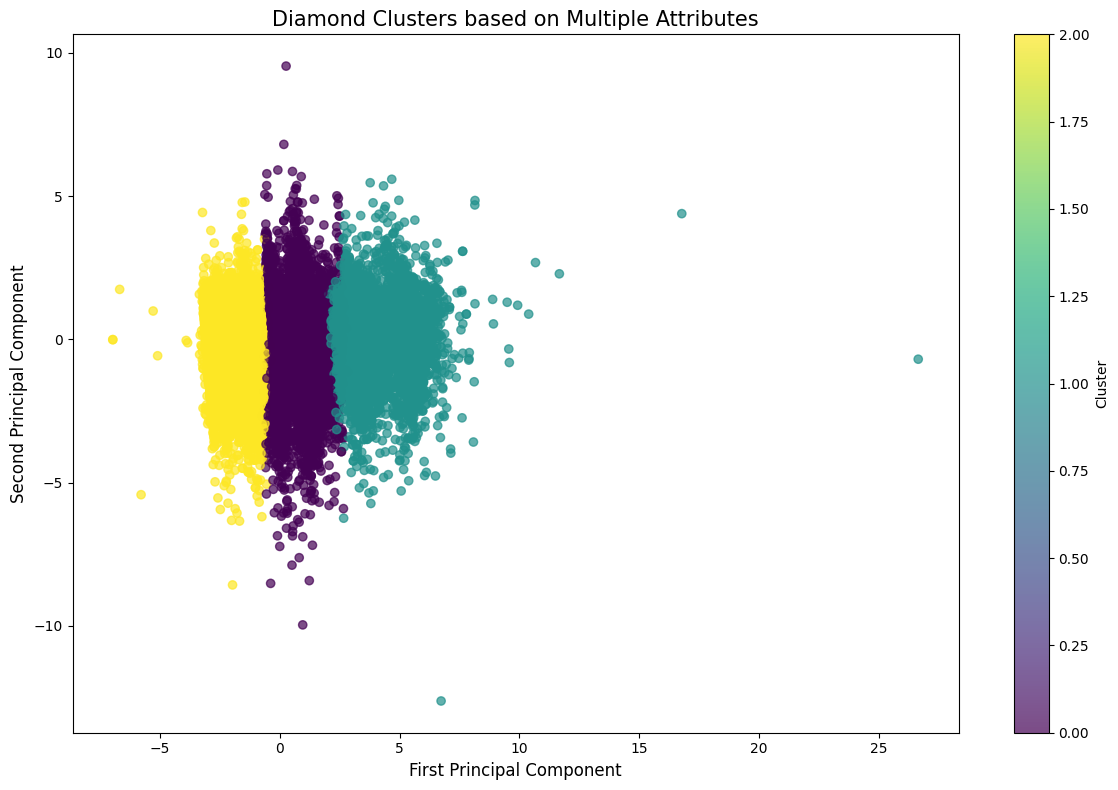

Cluster Characteristics:
            carat         price      depth      table         x         y  \
Cluster                                                                     
0        0.951309   4522.982719  61.824959  57.839719  6.273878  6.272033   
1        1.702973  12074.606296  61.728484  58.042324  7.623352  7.622972   
2        0.401677   1059.360173  61.689299  56.952836  4.708213  4.717232   

                z  
Cluster            
0        3.877170  
1        4.703219  
2        2.905313  

Silhouette Score: 0.37182343691833336


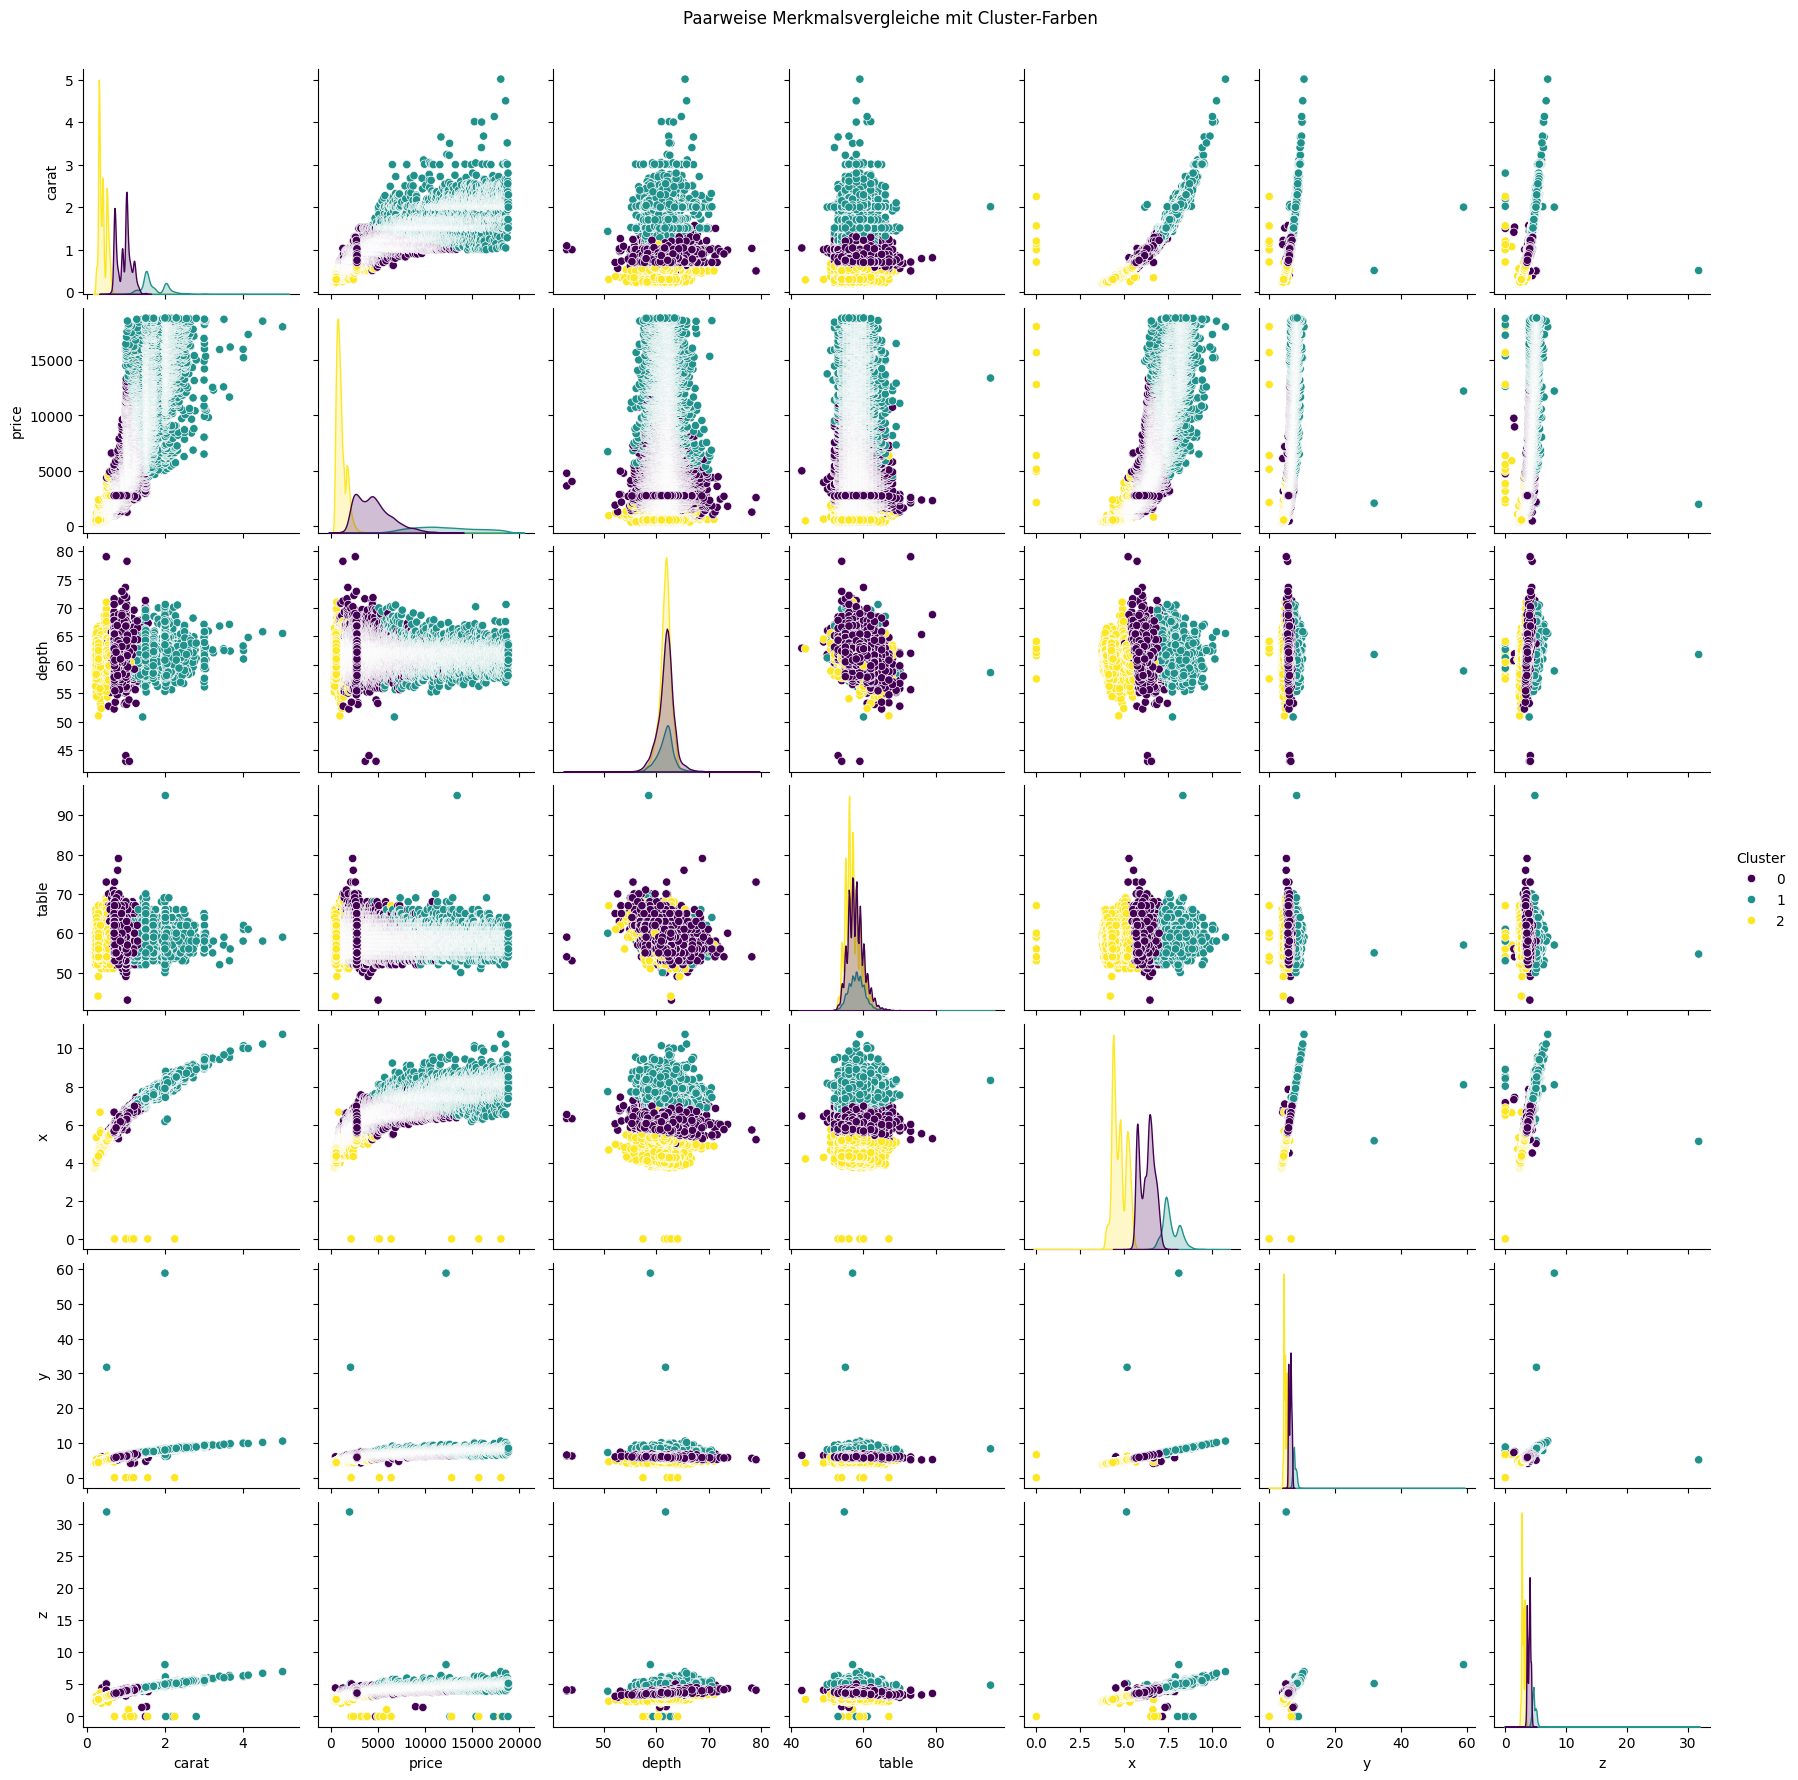

In [9]:
#Visualisierung der Cluster
# K-Means Clustering mit k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

# Cluster-Zentren anzeigen
print("Cluster-Zentren:\n", kmeans.cluster_centers_)

# Cluster-Anzahl überprüfen
print(df_cluster['Cluster'].value_counts())


# PCA für 2D-Visualisierung
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], 
                      c=df_cluster['Cluster'], 
                      cmap='viridis', 
                      alpha=0.7)
plt.title('Diamond Clusters based on Multiple Attributes', fontsize=15)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

# Cluster Characterization
cluster_summary = df_cluster.groupby('Cluster')[features].mean()
print("Cluster Characteristics:")
print(cluster_summary)

# Optional: Silhouette Score for Cluster Validation
silhouette_avg = silhouette_score(df_scaled, df_cluster['Cluster'])
print(f"\nSilhouette Score: {silhouette_avg}")

sns.pairplot(df_cluster, hue='Cluster', palette='viridis')
plt.suptitle("Paarweise Merkmalsvergleiche mit Cluster-Farben", y=1.02)
plt.show()

#3D-Visualisierung
fig = px.scatter_3d(df_cluster, 
                    x='carat', 
                    y='depth', 
                    z='price',
                    color='Cluster',
                    title='Interactive 3D Clustering of Diamonds',
                    labels={'Cluster': 'Cluster Group'})

fig.update_layout(scene=dict(
                    xaxis_title='Carat',
                    yaxis_title='Depth',
                    zaxis_title='Price'))

fig.show()

Silhouette Score ranges from -1 to 1
A score around 0.37 indicates:

The clustering is moderately good
Clusters have some meaningful separation
There's room for improvement in the clustering algorithm or feature selection

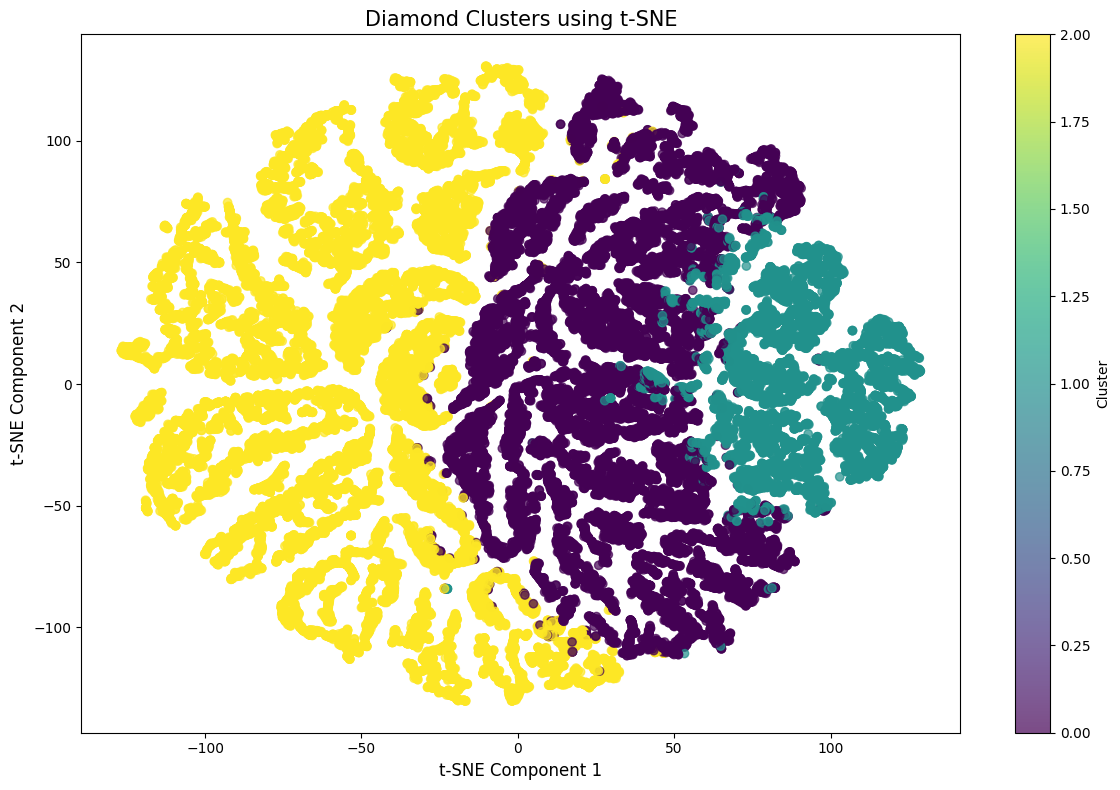

In [10]:
# t-SNE mit 2 Komponenten
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_tsne[:, 0], df_tsne[:, 1], 
                      c=df_cluster['Cluster'], 
                      cmap='viridis', 
                      alpha=0.7)
plt.title('Diamond Clusters using t-SNE', fontsize=15)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()